In [1]:
import qiskit
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit version: 2.1.1
Runtime version: 0.41.0


## 4교시 : Quantum Information and Operator Flow

Qiskit은 양자 정보를 위한 다양한 편의 기능들을 `qiskit.quantum_info` 모듈을 통해 제공하며 크게
- Statevector
- DensityMatrix
- Operator
의 세 개의 모듈로 구성되어 있습니다. 이 모듈들은 이름에 따라 각기 상태 벡터, 밀도 행렬 등의 설정, 초기화 등과 관련된 기능과 게이트, 관측가능량 등을 설정하는 전반적인 기능을 제공합니다. Statevector를 먼저 살펴봅시다.


### 4-1 : Statevector

앞서 실습에 사용해 본 것 처럼, Statevector 함수는 양자회로를 입력으로 받아 출력될 상태 벡터를 반환해 주는 기능을 갖습니다. 아래의 코드를 완성해 봅시다.

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization.array import array_to_latex


qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

statevector =  Statevector(qc)
array_to_latex(statevector)

<IPython.core.display.Latex object>

또한 원하는 statevector를 만들어 내는 데에도 사용할 수 있습니다. 위의 회로와 같은 값을 갖는 상태 벡터를 아래 셀을 사용해 만들어 봅시다.

In [6]:
import numpy as np

statevector = Statevector([np.pi/2,0,0,np.pi/2])
array_to_latex(statevector)

<IPython.core.display.Latex object>

잘 알려진 일부 상태는 label로 저장되어 불러들여 사용할 수도 있습니다.

사전 정의된 label들을 하나씩 살펴 봅시다.

In [7]:
statevector = Statevector.from_label('0')
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [8]:
statevector = Statevector.from_label('1')
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [9]:
statevector = Statevector.from_label('+')
statevector

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [10]:
statevector = Statevector.from_label('-')
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [11]:
statevector = Statevector.from_label('r')
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [12]:
statevector = Statevector.from_label('l')
array_to_latex(statevector)

<IPython.core.display.Latex object>

라벨의 조합도 가능합니다.

In [13]:
statevector = Statevector.from_label('01')
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [14]:
statevector = Statevector.from_label('+-')
array_to_latex(statevector)

<IPython.core.display.Latex object>

Statevector는 상태 벡터를 그림으로 그리는 여러 가지 방법도 가지고 있습니다.

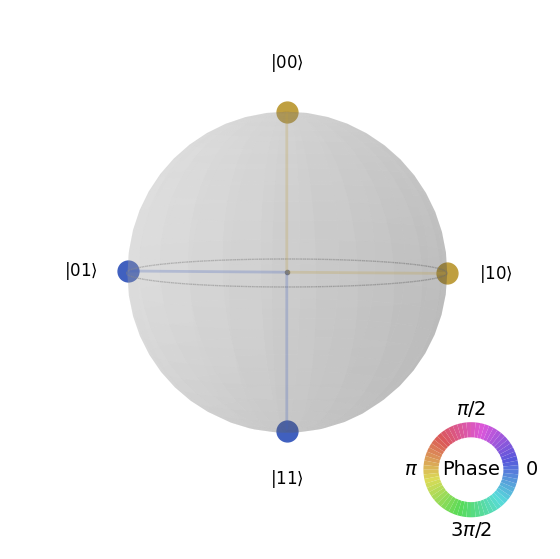

In [18]:
statevector.draw("qsphere")

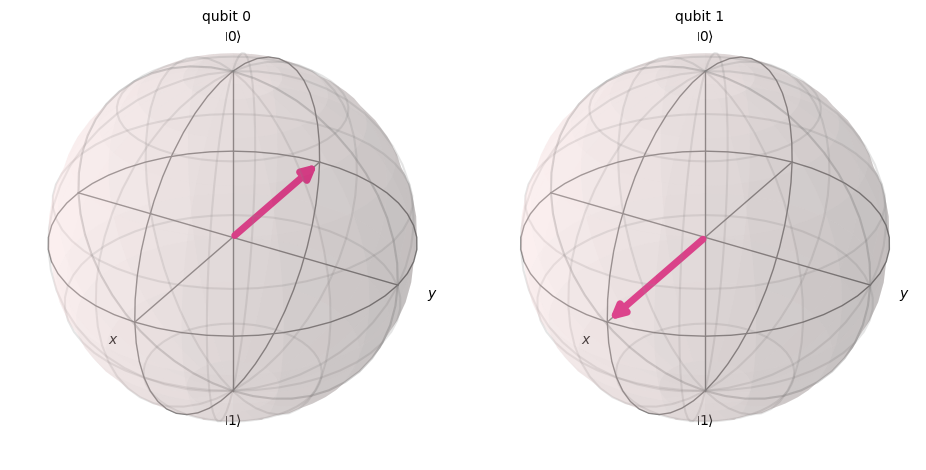

In [19]:
statevector.draw("bloch")

In [20]:
statevector.draw("text")

[ 0.5+0.j,-0.5+0.j, 0.5+0.j,-0.5+0.j]

그 외에 사용할 수 있는 옵션들은 latex, latex_source, hinton, city, paulivec 등이 있습니다. 아래의 셀에서 한번 자유롭게 테스트 해보세요.

In [ ]:
#


Statevector를 사용해서 측정될 확률도 바로 계산할 수 있습니다.

In [25]:
# 
statevector.probabilities()

array([0.25, 0.25, 0.25, 0.25])

statevector를 사용해서, shot 수에 따라 예측되는 결과도 출력해 볼수 있습니다.

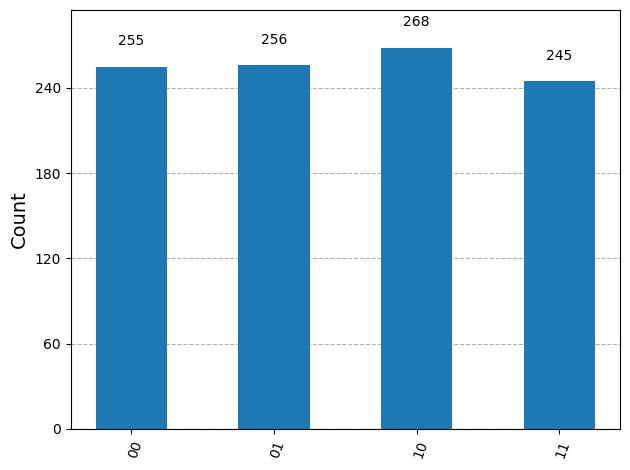

In [30]:
from qiskit.visualization import plot_histogram
#
#
plot_histogram(statevector.sample_counts(1024))

### 4-2 Density Matrix



In [31]:
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

dens_mat = DensityMatrix(qc)
array_to_latex(dens_mat)

<IPython.core.display.Latex object>

DensityMatrix 함수도 자주 사용하는 상태를 label로 불러서 사용할 수 있습니다. 

In [32]:
from qiskit.quantum_info import DensityMatrix, Operator

dens_mat = 0.5*DensityMatrix.from_label('0') + \
      0.5*DensityMatrix.from_label('1')
array_to_latex(dens_mat.data)

<IPython.core.display.Latex object>

Density matrix는 입력으로 operator를 받아서 evolve를 시킬수 있습니다. Operator에 대해서는 이어서 다루겠지만 이곳에서는 자주 사용하는 라벨 몇가지만 보여 드린 후, density matrix의 evolve를 실습해 보겠습니다. 

- ‘I’: [[1, 0], [0, 1]]
- ‘X’: [[0, 1], [1, 0]]
- ‘Y’: [[0, -1j], [1j, 0]]
- ‘Z’: [[1, 0], [0, -1]] 

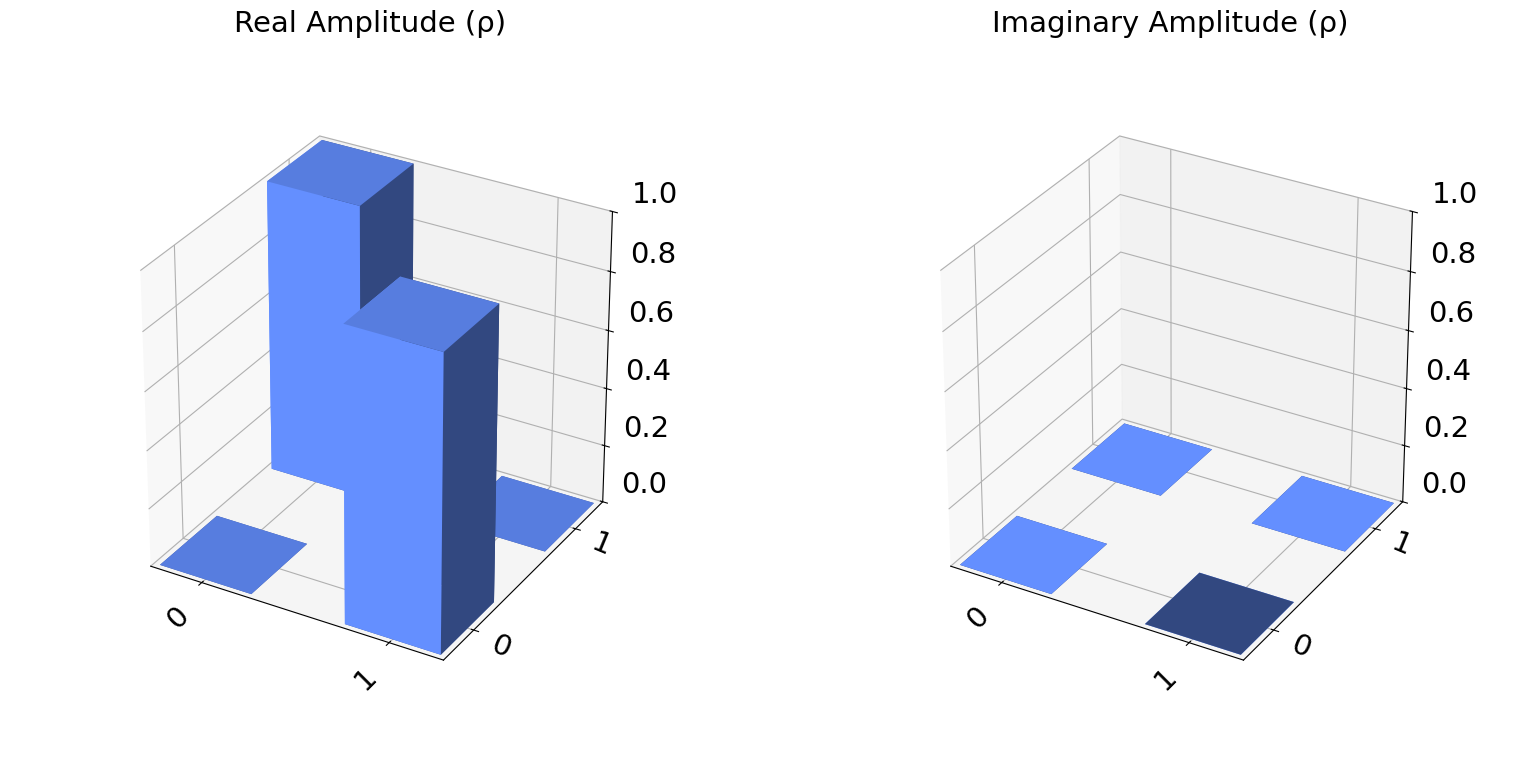

In [33]:
x_op = Operator.from_label('X')
dens_mat = DensityMatrix(x_op)
dens_mat.draw('city')

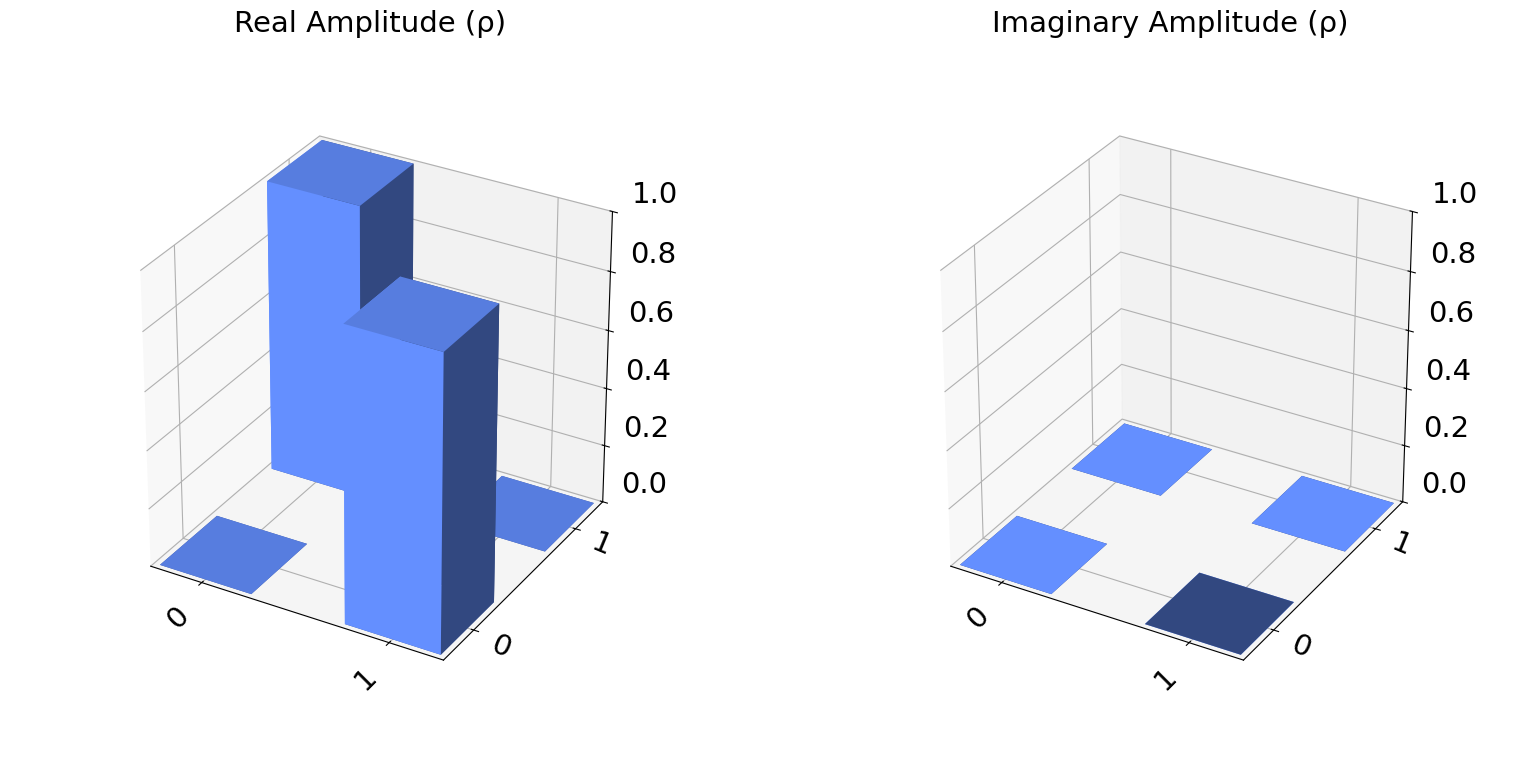

In [34]:
x_op = Operator.from_label('X')
dens_mat = dens_mat.evolve(x_op)
dens_mat.draw('city')


In [ ]:
#

In [ ]:
#

### 4-3 Quantum Information Operators

In [ ]:
from qiskit.quantum_info import Operator
 
qc = QuantumCircuit(2)

#


In [ ]:
op_XI = Operator([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [1, 0, 0, 0],
                  [0, 1, 0, 0]])
array_to_latex(op_XI.data)

In [35]:
from qiskit.quantum_info import Pauli
 
op_XI = Operator(Pauli('XI'))
array_to_latex(op_XI.data)

<IPython.core.display.Latex object>

In [36]:
from qiskit.circuit.library.standard_gates \
                            import CPhaseGate
import numpy as np

op_CP = Operator(CPhaseGate(np.pi / 4))
array_to_latex(op_CP.data)

<IPython.core.display.Latex object>

In [ ]:
pauli_piXZ = Pauli('-XZ')
array_to_latex(pauli_piXZ.to_matrix())

In [ ]:
qc = QuantumCircuit(2)
#
qc.x(1)
qc.z(0)

pauli_XZ = Pauli(qc)
print(pauli_XZ.equiv(Pauli('-XZ')))

True


In [38]:
from qiskit.quantum_info import SparsePauliOp

sparse_pauli_XZ = SparsePauliOp('XZ')
print(sparse_pauli_XZ)

SparsePauliOp(['XZ'],
              coeffs=[1.+0.j])


In [39]:
sparse_pauli_from_list = SparsePauliOp.from_list([('IZ', 1)])
print(sparse_pauli_from_list)

SparsePauliOp(['IZ'],
              coeffs=[1.+0.j])


In [41]:
from qiskit.quantum_info import state_fidelity

sv_a = Statevector.from_label('+')
sv_b = Statevector([1,  1] / np.sqrt(2))

In [42]:
state_fidelity(sv_a, sv_b)

0.9999999999999996

예제: 다음중 X 게이트와 같은 기능을 하는 Operator는?

In [ ]:
#A
op = Operator.Xop(0)

#B
op = Operator([[0,1]])

#C
qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)

#D
op = Operator([[1,0,0,1]])

In [ ]:
#C